Matplotlib is building the font cache; this may take a moment.


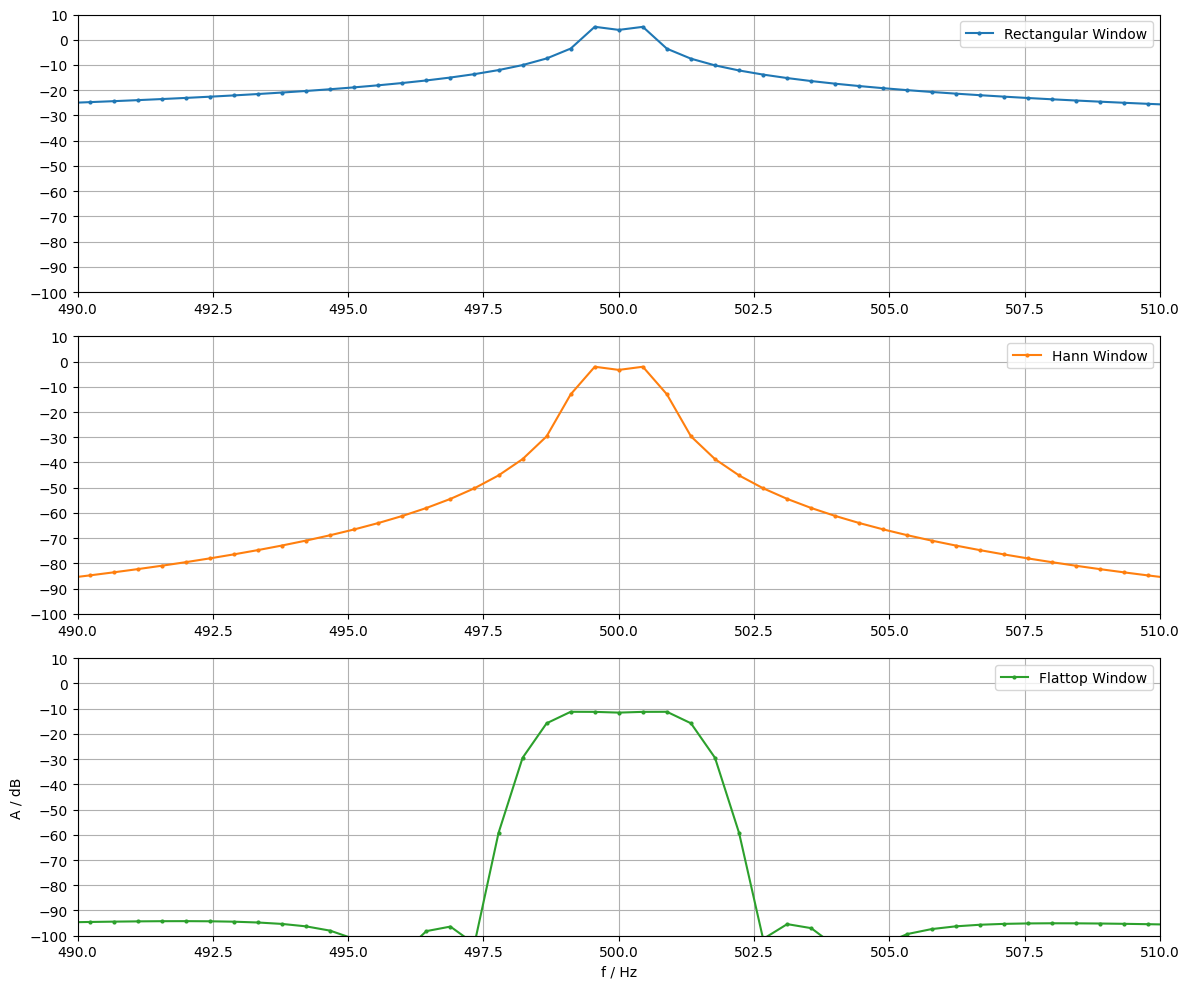

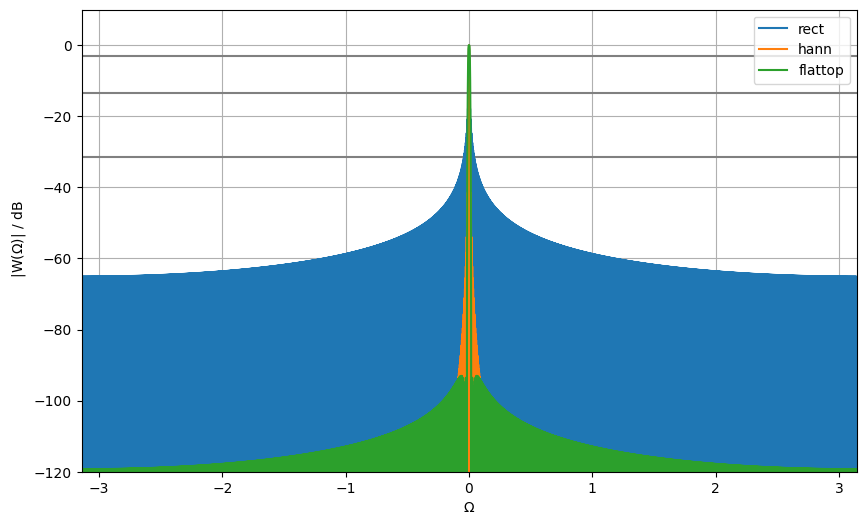

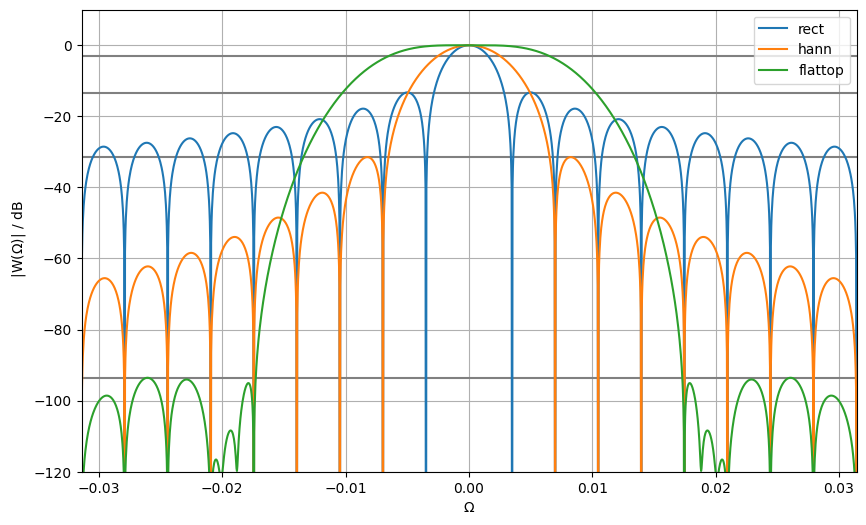

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
#from scipy.fft import fft, ifft, fftshift
from scipy.signal.windows import hann, flattop

f1 = 500.0
f2 = 500.25
f3 = 499.75
amplitude = 2.0
fs = 800.0
N = 1800

# 3. Generating Signals
k = np.arange(N)
x1 = amplitude * np.sin(2 * np.pi * f1 / fs * k)
x2 = amplitude * np.sin(2 * np.pi * f2 / fs * k)
x3 = amplitude * np.sin(2 * np.pi * f3 / fs * k)

x_total = x1 + x2 + x3

# 4. Generating Windows
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

# 5. DFT spectra using FFT algorithm

# 5.1. "Normalized" level of DFT within the interval
# this handling is working for N even and odd:
def fft2db (X) :
    N_fft = X.size
    Xtmp = 2/N_fft * np.abs(X) # independent of N, norm for sine amplitudes
    Xtmp[0] *= 1/2 # bin for f=0 Hz is existing only once,
    #so cancel *2 from above
    if N_fft % 2 == 0: #fs/2 is included as a bin
        # fs/2 bin is existing only once, SO cancel *2 from above
        Xtmp[N_fft//2] *= 1/2
    return 20*np.log10(Xtmp + 1e-10) # in dB

# setup of frequency vector this way is independent of N even/odd:
df = fs / N
f = np.arange(N) * df

X_rect = fft(x_total * wrect)
X_hann = fft(x_total * whann)
X_flattop = fft(x_total * wflattop)

plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X_rect), 'C0o-', ms=2, label='Rectangular Window')
plt.xlim(490, 510)
plt.ylim(-100, 10)
plt.xticks(np.arange(490, 511, 2.5))
plt.yticks(np.arange(-100, 11, 10))
plt.legend()
#plt.xlabel('f / Hz')
#plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X_hann), 'C1o-', ms=2, label='Hann Window')
plt.xlim(490, 510)
plt.ylim(-100, 10)
plt.xticks(np.arange(490, 511, 2.5))
plt.yticks(np.arange(-100, 11, 10))
plt.legend()
#plt.xlabel('f / Hz')
#plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X_flattop), 'C2o-', ms=2, label='Flattop Window')
plt.xlim(490, 510)
plt.ylim(-100, 10)
plt.xticks(np.arange(490, 511, 2.5))
plt.yticks(np.arange(-100, 11, 10))
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

plt.tight_layout()
plt.show()

# 5.2. Window DTFT spectra normalized to their mainlobe maximum
def winDTFTdB(w):
    N_win = w.size       # get window length
    Nz = 100 * N_win     # zeropadding length
    W_padded = np.zeros(Nz, dtype=complex) # allocate RAM
    W_padded[0:N_win] = w # insert window
    
    W_dtft_mag = np.abs(fftshift(fft(W_padded))) # fft, fftshift and magnitude
    
    W_dtft_normalized = W_dtft_mag / np.max(W_dtft_mag) # normalize to maximum, i.e. the mainlobe
    
    W_dtft_db = 20 * np.log10(W_dtft_normalized + 1e-10) # get level in dB
    
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi # get appropriate digital frequencies # also shifted
    
    return Omega, W_dtft_db

Omega_rect, W_rect_dtft = winDTFTdB(wrect)
Omega_hann, W_hann_dtft = winDTFTdB(whann)
Omega_flattop, W_flattop_dtft = winDTFTdB(wflattop)

plt.figure(figsize=(10, 6))

plt.plot([-np.pi, +np.pi], [-3.01, -3.01], 'gray')# mainlobe bandwidth
plt.plot([-np.pi, +np.pi], [-13.3, -13.3], 'gray')# rect max sidelobe
plt.plot([-np.pi, +np.pi], [-31.5, -31.5], 'gray')# hann max sidelobe
plt.plot([-np.pi, +np.pi],[-93.6, -93.6], 'gray')# flattop max
#sidelobe

plt.plot(Omega_rect, W_rect_dtft, label='rect')
plt.plot(Omega_hann, W_hann_dtft, label='hann')
plt.plot(Omega_flattop, W_flattop_dtft, label='flattop')

plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlabel(r'$\Omega$')
plt.ylabel(r' |W($\Omega$)| / dB')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))

plt.plot([-np.pi/100, np.pi/100], [-3.01, -3.01], 'gray')
plt.plot([-np.pi/100, np.pi/100], [-13.3, -13.3], 'gray')
plt.plot([-np.pi/100, np.pi/100], [-31.5, -31.5], 'gray')
plt.plot([-np.pi/100, np.pi/100],[-93.6, -93.6], 'gray')

plt.plot(Omega_rect, W_rect_dtft, label='rect')
plt.plot(Omega_hann, W_hann_dtft, label='hann')
plt.plot(Omega_flattop, W_flattop_dtft, label='flattop')

plt.xlim(-np.pi / 100, np.pi / 100) # zoom into mainlobe
plt.ylim(-120, 10)
plt.xlabel(r'$\Omega$')
plt.ylabel(r' |W($\Omega$)| / dB')
plt.legend()
plt.grid(True)
plt.show()